### Assessed Coursework

This assessed coursework makes up 15% of your final grade. There are a total of **60 marks**.

## Autograder tests

These coursework exercises will (mainly) be autograded via automatic tests.

The following parts have some questions to answer, and some tests (which you cannot alter) which will be run against the code you have written. If the tests pass, you will see how many marks you got with a green tick. If they do not pass, you will see a red cross. To satisfy the test you **MUST** use the variable names instructed.

## Vectorised calculations

All calculations should be done **WITHOUT USING LOOPS** (i.e. `for` or `while`): vectorised calculations should be used instead.

In [87]:
# Make sure you run this cell!

from jhwutils.tick import reset_marks, summarise_marks, marks
from jhwutils.checkarr import array_hash, check_hash
import numpy as np  # NumPy
from jhwutils.matrices import print_matrix, show_boxed_tensor_latex

# NumPy
import numpy as np  
import binascii

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

import jhwutils.image_audio as ia

reset_marks()

def case_crc(s):
    h_crc =  binascii.crc32(bytes(s.lower(), 'ascii'))
    print(h_crc)
    return h_crc

# ignore any warnings below, they don't affect the results
print("Everything imported OK")

Everything imported OK


## Image operations
Images can be represented as numerical arrays. We will use images as an example to explore NumPy functionality.

* `img = ia.load_image_colour('filename.png')` will load an image as an array.
* `ia.show_image(img)` will show it in the notebook.


**Task 1:** Reading arrays

* Load `data/Belle.jpg` as `img_array` 
* Print out its shape and dtype
* Show the image.

In [88]:
img_array = ia.load_image_colour('imgs/Belle.jpg')
print(img_array.shape, img_array.dtype)
#ia.show_image(img)

(1333, 1000, 3) float64


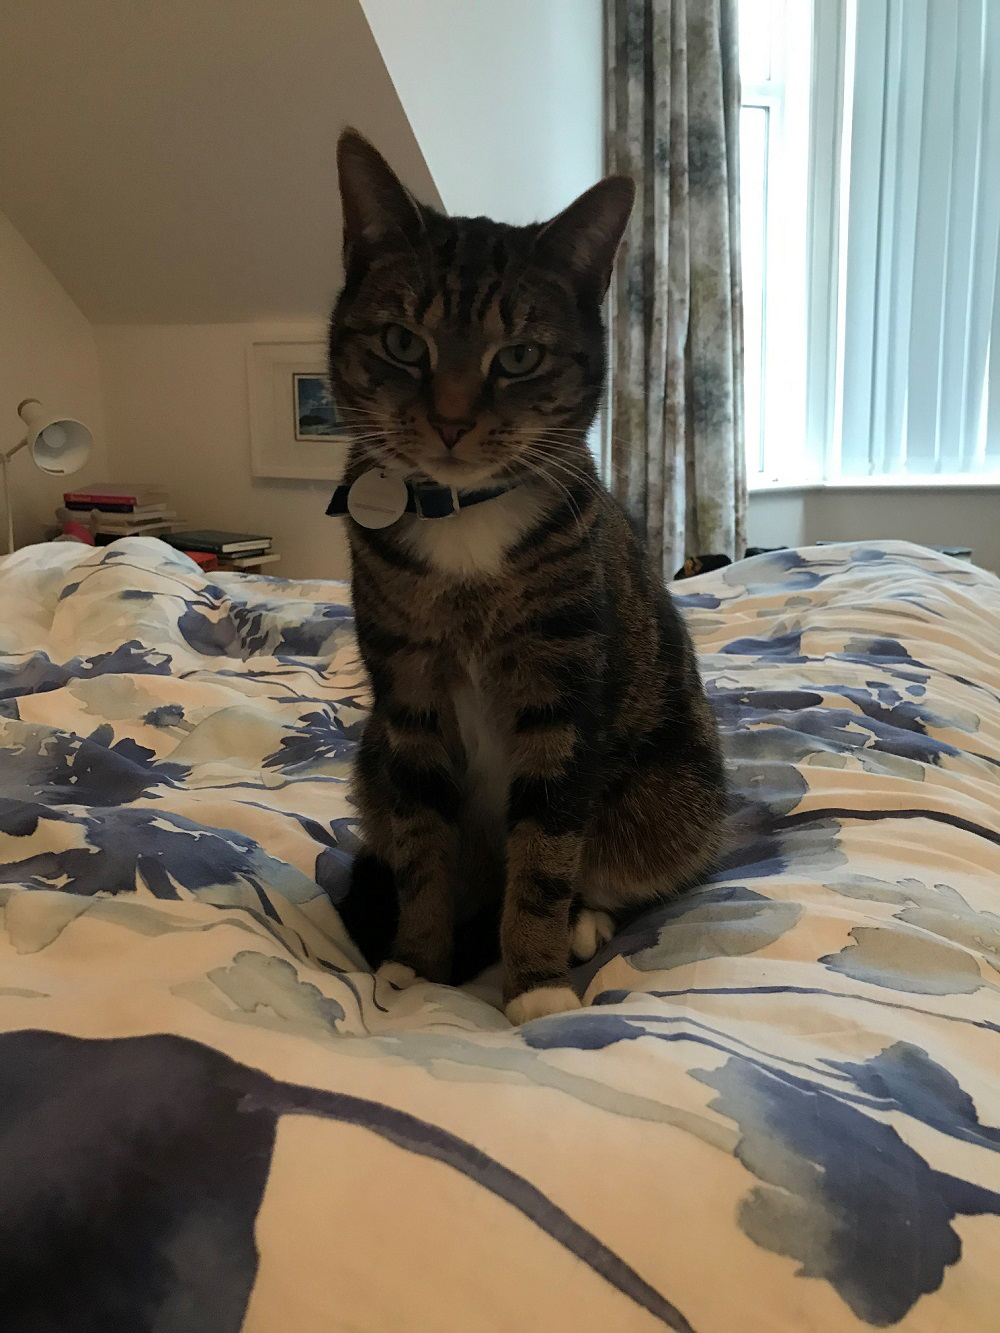

In [89]:
ia.show_image(img_array)
with marks(2):
    assert(check_hash(img_array, ((1333, 1000, 3), 3292019427589.6)))

**Task 2: Slicing arrays**

* This photo is of my famiy's cat Belle
* Belle is a primma donna so when her photos are shared on social media she likes them to be cropped to remove extra detail from the background and make it all about her!
* Create an array `cropped` which has the pixels from [100,300] to [1050,750]. Note that these positions are in `[row, col]` format, not `[x,y]`.
* Display the cropped array using `show_image()`. 
* Show the cropped image so you can see it.

In [90]:
cropped = img_array[100:1050, 300:750]

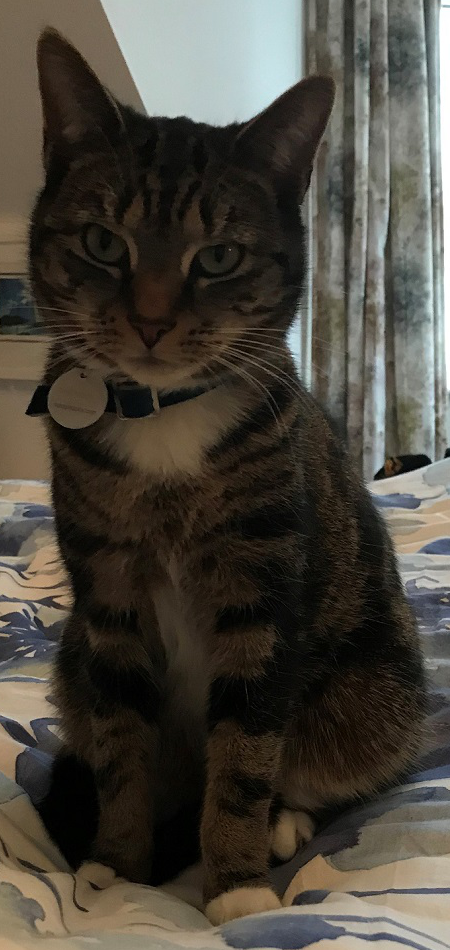

In [91]:
ia.show_image(cropped)
with marks(2):
    assert(check_hash(cropped, ((950, 450, 3), 194237516707.641)))

Task 3:  **Modifying arrays**

Belle recently had an injury to her chest, which resulted in her having to be shaved and have stitches. Although her hair is now grown back she is still shy about anybody seeing her chest. To allow me to share this photo on social media, create an array "censored" which is the same as `cropped`, but has a black box across the following region to protect Belle's privacy:

    * [400,100] -> [600, 250]

Setting array elements to zero will make them black.

**Do not modify the original `img_array`**

In [92]:
##### YOUR SOLUTION HERE #####
censored = cropped.copy()
censored[400:600, 100:250] = 0

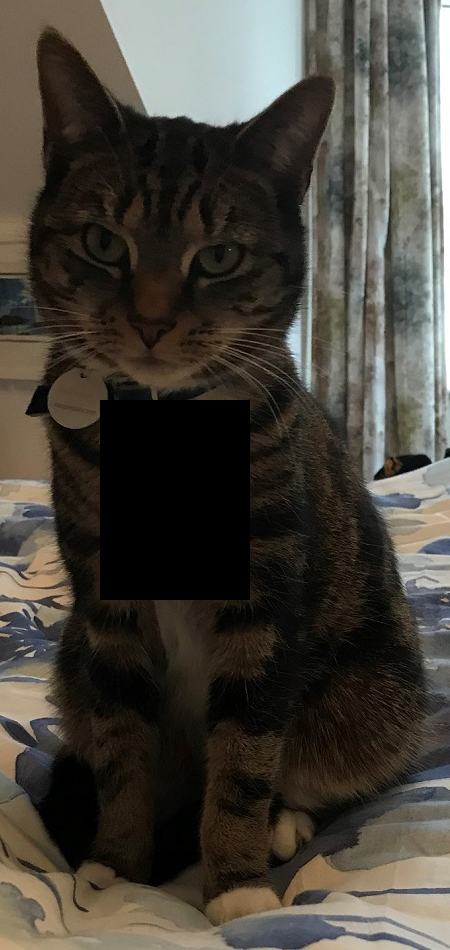

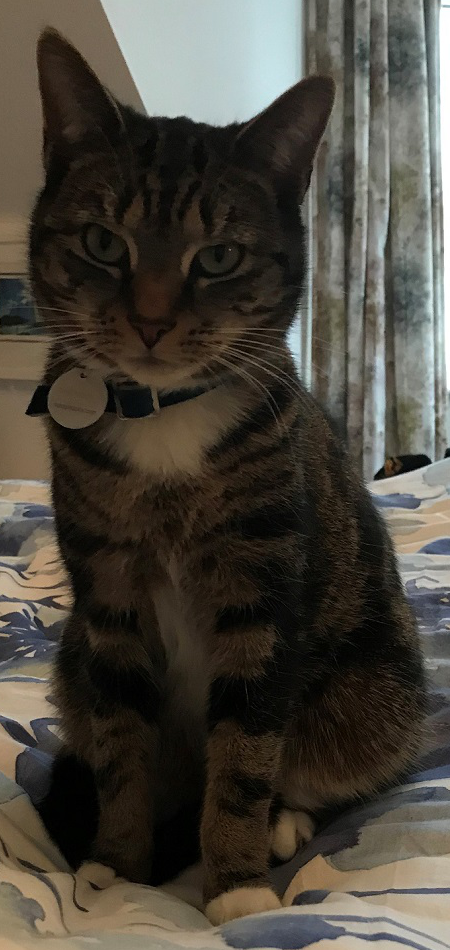

In [93]:
### print("2 tests here to ensure instructions were followed!")

with marks(3):
    assert(check_hash(censored, ((950, 450, 3), 185547122562.073)))
ia.show_image(censored)
with marks(3):
    assert(check_hash(cropped, ((950, 450, 3), 194237516707.641)))
ia.show_image(cropped)

Task 4: **Matrix**

Define the following matrix

$$
\begin{matrix}
1 & 2 & 5 & 4\\
6 & 9 & 4 & 1\\
5 & 7 & 3 & 1\\
5 & 6 & 2 & 2
\end{matrix}$$

stored in a numpy array called `matrix`

In [94]:
matrix = np.array([[1, 2, 5, 4], [6, 9, 4, 1], [5, 7, 3, 1], [5, 6, 2, 2]])

In [95]:
with marks(1):
    assert(check_hash(matrix, ((4, 4), 547.2415385738958)))

Task 5: **Eigen problem**

Calculate the eigenvalues and eigen vectors of `matrix` and store them in `eigen`

In [96]:
eigen = np.linalg.eig(matrix)

In [97]:
with marks(1):
    assert(check_hash(eigen[0], ((4,), 40.91377718641574)))
    
with marks(2):
    assert(check_hash(eigen[1], ((4, 4), 14.71076587683482)))

Task 6: **Centre on origin**

`matrix` represents a collection of vectors of points in 4D space. Calculate `mean_vec` the mean of these 4 vectors. Use `mean_vec` to centre the matrix on the origin, storing the result in `centred_mat`. Confirm that the mean of `centred_mat` is the origin and store this mean in `centred_mean`.

In [98]:
print(matrix)
mean_vec = np.mean(matrix, axis=0)
centre_mat = matrix - mean_vec
centre_mean = np.mean(centre_mat, axis=0)
print(mean_vec)

[[1 2 5 4]
 [6 9 4 1]
 [5 7 3 1]
 [5 6 2 2]]
[4.25 6.   3.5  2.  ]


In [99]:
with marks(1):
    assert(check_hash(mean_vec, ((4,), 52.00271482772536)))
    
with marks(2):
    assert(check_hash(centre_mat, ((4, 4), 11.04843682124227)))
    
with marks(1):
    assert(check_hash(centre_mean, ((4, ), 0.)))

Task 7: **Inner product**

Calculate the inner product of the vectors **`x`**` = [8.26, 9.32, 2.57, 7.26, 3.33]` and **`y`**` = [17.34, 7.11, 3.34, 7.87, 1.23]`. Store the result in `inner`. 

In [100]:
x = np.array([8.26, 9.32, 2.57, 7.26, 3.33])
y = np.array([17.34, 7.11, 3.34, 7.87, 1.23])
inner = np.inner(x, y)

In [101]:
with marks(2):
    assert(check_hash(inner, ((), 1396.5475000000001)))

Task 8: **Angle between vectors**

calculate the angle between **`x`** and **`y`** and store the angle in degrees in `deg`

In [102]:
inner = np.inner(x, y)
norms = np.linalg.norm(x) * np.linalg.norm(y)
cos = inner / norms
radians = np.arccos(np.clip(cos, -1.0, 1.0))

deg = np.rad2deg(radians)

In [103]:
with marks(2):
    assert(check_hash(deg, ((), 128.30919159596243)))

Task 9: **Working with tensors**

The file `data/font_sheet.png` contains a number of characters in different fonts. It is an image which consists of the images of each *printable* ASCII character, (characters 32-128) arranged left to right. Each character image is precisely square. 

These are the characters present, in order:

In [104]:
chars = "".join([chr(i) for i in range(32,128)])
print(chars)

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


Each font is also stacked left to right, so the image is one *very* long strip of characters. The image is grayscale.

(1856, 6144)


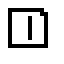

In [105]:
# show a portion of the image
all_fonts = ia.load_image_gray("data/font_sheet.png")
print(all_fonts.shape)
ia.show_image(all_fonts[64:128, 1024:1088])

Rearrange the image into a tensor called `font_sheet` that is ordered like this:

        (font, character, rows, cols)
        
* Showing the image `font_sheet[16, 33, :, :]` should show the "A" character of the 17th font.
* Showing the image `font_sheet[10, 1, :, :]` should be the "!" character of the 11th font.

In [106]:
## hint
from jhwutils.matrices import show_boxed_tensor_latex
n = np.arange(64).reshape(8, 8)
show_boxed_tensor_latex(n, box_rows=False)
show_boxed_tensor_latex(n.reshape(4,4,2,2), box_rows=False)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [107]:
font_sheet = all_fonts.reshape(29, 64, 96, 64).swapaxes(1, 2)

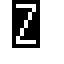

In [108]:
# if your code worked, you should see a gif of letters below
ia.show_gif(font_sheet[8, 33:33+26, :, :], width="20%")


In [109]:
# test shape is correct
with marks(6):        
    assert(check_hash(font_sheet.shape, ((4,), 944.9499472573252)))
# test content is ok
with marks(10):    
    assert(np.allclose(array_hash(font_sheet)[1], 55441039333148.88, atol=1e-2, rtol=1e-2)) 

Task 10: **Producing appropriate visualisations**

Here we will be using data on recent earthquakes in California. 

This data set is in the file `data/earthquakes.txt`.

### The task
The data is a 2D array, and has six columns, with these definitions:
            
         0             1              2              3               4              5
    Magnitude | Date(DDMMYYYY) | Time(HHMM) | Latitude(deg N) | Longitude(deg W) | Depth(km)
    
Each row represents one set of observations (i.e. one earthquake). 

A. **Loading arrays** 
* Load this data as a NumPy array called `quakes`. Note: use NumPy functions to do this! **Do not parse the file yourself** The file is space delimited.
* Print it out. Use this format to print out the results:
    
      print("quakes\n", quakes)

In [110]:
quakes = np.loadtxt("data/earthquakes.txt")

In [111]:
with marks(2):
    assert(check_hash(quakes, ((849, 6), 8635575722872.79)))

B. **Visualising data**

Produce a visualisation of this data using the latitude, longitude and magnitude columns. The result should be a 2D plot that shows the location and magnitude of the earthquakes: you should choose some appropriate way to present 3 dimensions of data in a 2D plot.

One point to note is that the longitude is given in degrees west. If you use these values without adjustment the plot will appear the "wrong way round" (on maps locations further west are further to the left) so you should make an adjustment to take account of that.

**Since there is not one correct way to produce this chart this question cannot be autograded and it is not "all or nothing" like the other questions here. There are a total of 20 marks available, though answers that do not meet all of the requirements of a good scientific figure will be graded proportionately.**

Text(0, 0.5, 'Latitude (from Equator)')

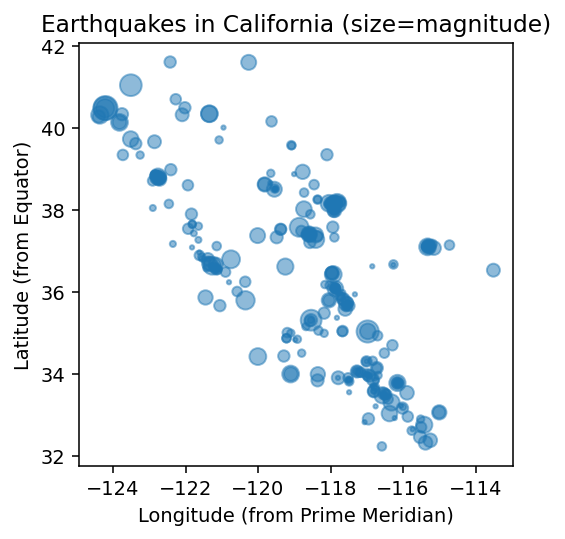

In [122]:
# mag, date, time, lat, long, depth

# I have made all the longitude values negative to account for them being provided in degrees west

figure = plt.figure(figsize=(4, 4))
axes = figure.add_subplot(1, 1, 1)
sizes = (quakes[:, 0] - 1) * 50
paths = axes.scatter(np.negative(quakes[:, 4]), quakes[:, 3], s=sizes, alpha=0.5)
axes.set_title("Earthquakes in California (size=magnitude)")
axes.set_xlabel("Longitude (from Prime Meridian)")
axes.set_ylabel("Latitude (from Equator)")